In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pretty_midi
import os
from mido import Message, MidiFile, MidiTrack
import utils
import midiFile

In [2]:
midi_path = os.path.join(utils.DATA_ROOT, "ABBA/Super Trooper.mid")
# midi_path = "midis/TLS-0.mid"
theMidiFile = midiFile.MidiFile(midi_path)
pm = pretty_midi.PrettyMIDI(midi_path)
pm.remove_invalid_notes()

In [3]:
ticks_per_beat = theMidiFile.midi_file.ticks_per_beat
beats = pm.get_beats()
ticks = np.array([pm.time_to_tick(t) for t in beats]) # convert sec to tick
print(f"ticks per beat: {ticks_per_beat}")
print(f"ticks per measure: {theMidiFile.current_ticks_per_measure}")
print(f"ticks: {ticks}")

ticks per beat: 384
ticks per measure: 1536.0
ticks: [     0    384    768   1152   1536   1920   2304   2688   3072   3456
   3840   4224   4608   4992   5376   5760   6144   6528   6912   7296
   7680   8064   8448   8832   9216   9600   9984  10368  10752  11136
  11520  11904  12288  12672  13056  13440  13824  14208  14592  14976
  15360  15744  16128  16512  16896  17280  17664  18048  18432  18816
  19200  19584  19968  20352  20736  21120  21504  21888  22272  22656
  23040  23424  23808  24192  24576  24960  25344  25728  26112  26496
  26880  27264  27648  28032  28416  28800  29184  29568  29952  30336
  30720  31104  31488  31872  32256  32640  33024  33408  33792  34176
  34560  34944  35328  35712  36096  36480  36864  37248  37632  38016
  38400  38784  39168  39552  39936  40320  40704  41088  41472  41856
  42240  42624  43008  43392  43776  44160  44544  44928  45312  45696
  46080  46464  46848  47232  47616  48000  48384  48768  49152  49536
  49920  50304  50688  5

### Transcription

MIDI files are at their core a way of storing a score of a piece of music, so the MIDI files in the Lakh MIDI dataset can be used to obtain a transcription of the audio files they are matched and aligned to.  `pretty_midi`'s `get_piano_roll()` method provides a convenient way of getting a "piano roll representation" of the transcription.

In [4]:
# Retrieve piano roll of the MIDI file
all_piano_rolls = pm.get_piano_roll() # get the piano roll of all the instruments 
instruments = pm.instruments
print(f"Instruments: {instruments}")
print(f"Piano rolls shape (128 keynotes): {all_piano_rolls.shape}")

Instruments: [Instrument(program=0, is_drum=True, name="SuperTrooper"), Instrument(program=52, is_drum=False, name="SuperTrooper"), Instrument(program=82, is_drum=False, name="SuperTrooper"), Instrument(program=25, is_drum=False, name="SuperTrooper"), Instrument(program=9, is_drum=False, name="SuperTrooper"), Instrument(program=2, is_drum=False, name="SuperTrooper"), Instrument(program=33, is_drum=False, name="SuperTrooper"), Instrument(program=27, is_drum=False, name="SuperTrooper"), Instrument(program=29, is_drum=False, name="SuperTrooper"), Instrument(program=53, is_drum=False, name="SuperTrooper"), Instrument(program=38, is_drum=False, name="SuperTrooper"), Instrument(program=90, is_drum=False, name="SuperTrooper")]
Piano rolls shape (128 keynotes): (128, 25398)


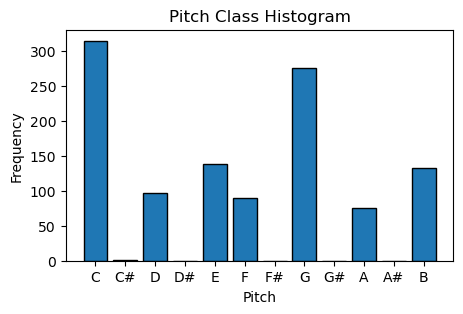

In [10]:
thePiano = pm.instruments[1]
# thePiano.notes
pitch_class_histogram = thePiano.get_pitch_class_histogram() # pitch class = C(0), C#(1), D(1) ... A#(10), B(11)
piano_pitches = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Create the bar chart
plt.figure(figsize=(5, 3))
plt.bar(piano_pitches, pitch_class_histogram, edgecolor='black')

# Add title and labels
plt.title('Pitch Class Histogram')
plt.xlabel('Pitch')
plt.ylabel('Frequency')

# Show the plot
plt.show()

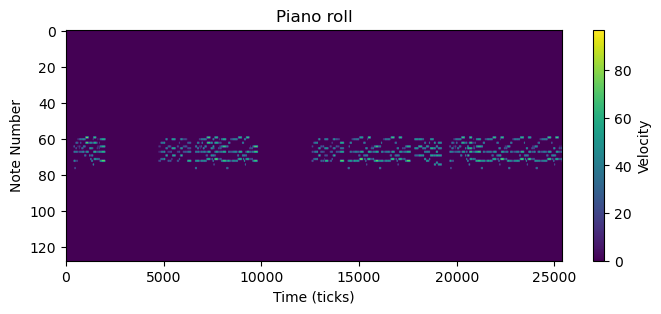

In [11]:
thePiano_piano_roll = thePiano.get_piano_roll()
plt.figure(figsize=(8, 3))
plt.imshow(thePiano_piano_roll, aspect='auto', cmap='viridis')  # 'aspect' set to 'auto' for better aspect ratio handling
cb = plt.colorbar()  # Add a colorbar to show the scale
cb.set_label('Velocity')
plt.title('Piano roll')
plt.xlabel('Time (ticks)')
plt.ylabel('Note Number')
plt.show()

In [12]:
intervals = np.array([(pm.time_to_tick(note.start), pm.time_to_tick(note.end)) for note in thePiano.notes])
notes = np.array([note.pitch for note in thePiano.notes])
notes = notes.reshape(-1, 1)
note_interval = np.concatenate((notes, intervals), 1)
note_interval

array([[    64,   3072,   3328],
       [    72,   3072,   3340],
       [    67,   3072,   3340],
       ...,
       [    67, 194688, 194876],
       [    64, 194688, 194892],
       [    72, 194688, 194960]])

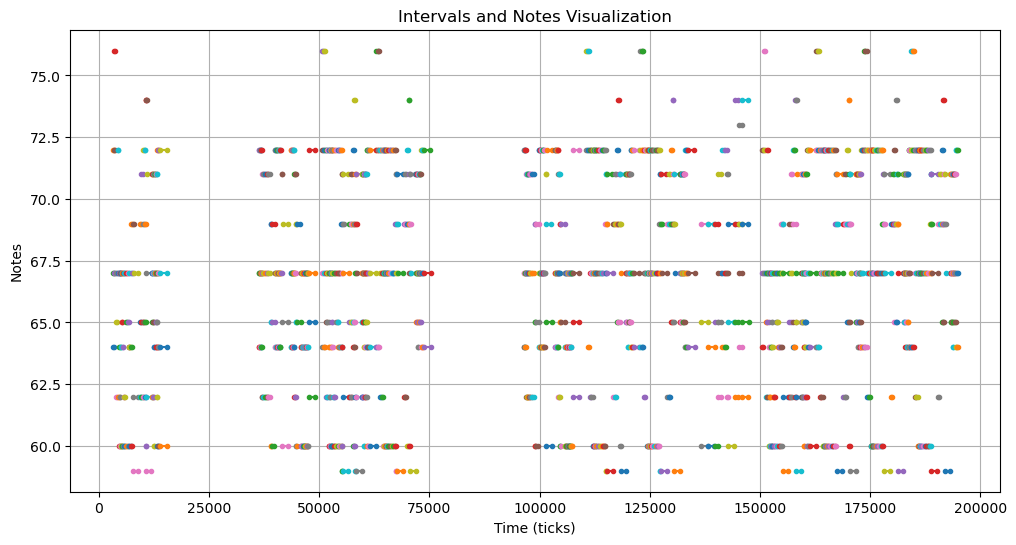

In [13]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot intervals as horizontal lines
for i, interval in enumerate(intervals):
    ax.plot(interval, [notes[i], notes[i]], marker='.')

# Customize the plot
ax.set_title('Intervals and Notes Visualization')
ax.set_xlabel('Time (ticks)')
ax.set_ylabel('Notes')
ax.grid(True)